In [4]:
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastai.vision.all import *

In [3]:
def search_func(keyword,max_images=30):
    print('downloading ',keyword)
    return L(ddg_images(keyword,max_results=max_images)).itemgot('image')

In [7]:
from fastdownload import download_url
searches=['Chris Hemsworth','Christopher Robert Evans','scarlett johansson']
path=Path('Celebs_face_identify')
from time import sleep
for s in searches:
    dest=(path/s)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_func(f'{s} face photo'))
    sleep(2)
    resize_images(path/s,max_size=400,dest=path/s)

downloading  Chris Hemsworth face photo
downloading  Christopher Robert Evans face photo


In [14]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

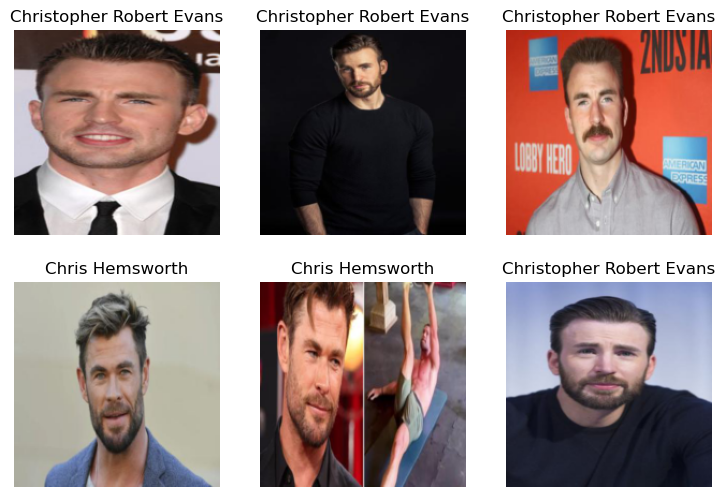

In [15]:
dls=DataBlock(
              blocks=(ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(valid_pct=0.2,seed=42),
              get_y=parent_label,
              item_tfms=[Resize(192,method='squish')]
             ).dataloaders(path,bs=32)
dls.show_batch(max_n=6)

In [49]:
learner=vision_learner(dls,vgg16,metrics=error_rate)
learner.fine_tune(6)

/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/hemanththaluru/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|████████████████████████████████████████| 528M/528M [00:10<00:00, 53.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.359218,1.113630,0.571429,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.680118,0.943091,0.666667,00:12
1,0.710759,0.859544,0.571429,00:13
2,0.676776,0.803262,0.476190,00:21
3,0.555889,0.764211,0.333333,00:25
4,0.472739,0.740627,0.285714,00:37
5,0.406348,0.750007,0.333333,00:32


In [57]:
# !pwd
nam,_,chance=learner.predict(PILImage.create('/Volumes/THALURU/DS/FastAI/chapter-1/Celebs_face_identify/chris3.webp'))
print(nam,f'{chance[0]:.4f}')

Christopher Robert Evans 0.4425


In [60]:
??download_images